# Linear Regression

### General idea:

Given a set of data points $\{x_1, \cdots, x_m\}$ associated to a set of outcomes $\{y_1, \cdots, y_m\}$ we want to build a model to classify $y$ from $x$.

### Hypothesis:

For a given input data $x_i$ the model we choose, noted $h_{\theta}$, prediction output is $h_{\theta}(x_i)$.

### Loss Function:

The loss functions is a function $L : (z,y) \in \mathbf{R} \times Y → L(z,y) \in \mathbf{R} $ that takes as inputs the predicted value $z$ corresponding to the real data value $y$ and outputs how different they are. For a logistic classification the common loss functions is the Logistic Loss:

$$
\log(1+\exp(-yz)).
$$

### Cost Function:

The cost function is often used to assess the performance of a model, it is defined as follows:

$$
J(\theta) = \sum_{i=1}^{m}L(h_{\theta}(x_i), y_i)
$$

### Model:


**Sigmoid Function** - The sigmoid function $g$, also known as the logistic function, is defined as follows:

$$
\forall z \in \mathbf{R}, g(z) = \frac{1}{1+e^{-z}} \in ]0,1[.
$$

**Logistic Regression ** -We assume here that $y|x ; \sim Bernoulli(\phi)$. We have the following form:

$$
\phi = p(y=1 | x: \theta) = \frac{1}{1+ \exp(-\theta^Tx)} = g(\theta^T x)
$$

Ref: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning

# EXAMPLES



## Multiple Regression - Startups

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 4].values

# Encoding categorical data
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# Using ColumnTransformer for one-hot encoding
onehotencoder = OneHotEncoder(categories='auto', drop='first')
X = onehotencoder.fit_transform(X).toarray()

# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Training the model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Prediction
y_pred = regressor.predict(X_test)


## Scatter Plot of Predicted vs. Actual Values:



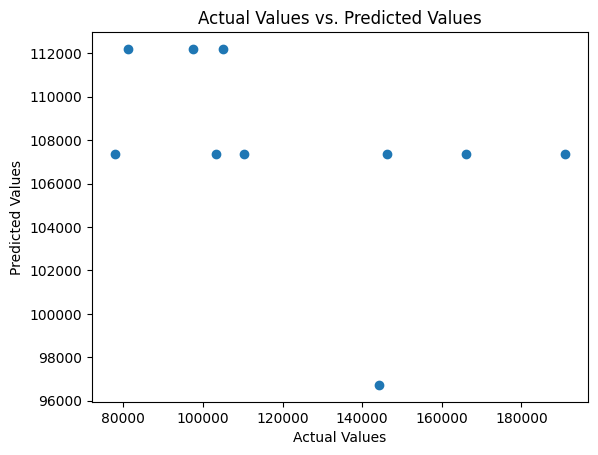

In [7]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs. Predicted Values")
plt.show()


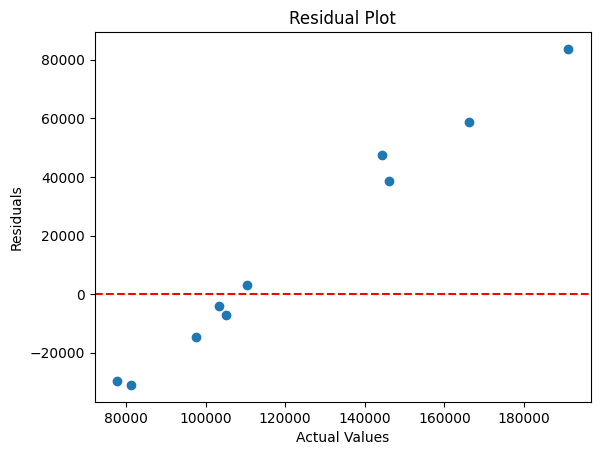

In [8]:
residuals = Y_test - y_pred
plt.scatter(Y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


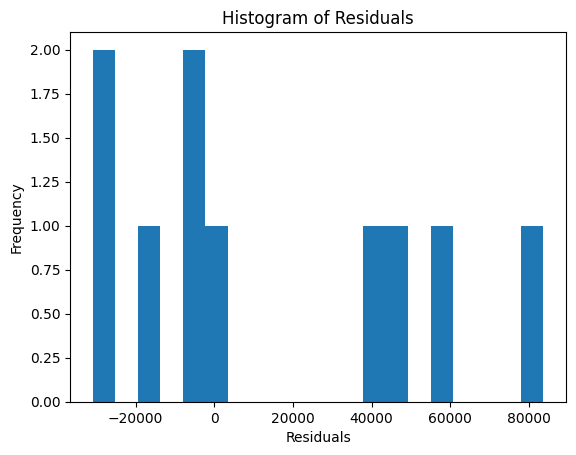

In [9]:
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()
